# Question1

In [258]:
# q1 part1

In [259]:
# the quadratic euation with hundred data points
import numpy as np
x = np.random.rand(100,1)
y = 3.4 + 2.1*x + np.random.randn(100,1)

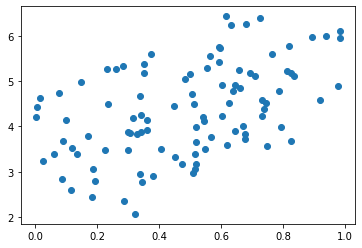

In [260]:
# scatter plot for equation
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [261]:
X_b = np.c_[np.ones((100,1)), x]

In [262]:
print(X_b[:3])

[[1.         0.97663436]
 [1.         0.26297176]
 [1.         0.54185897]]


In [263]:
print(type(X_b), X_b.shape, X_b.ndim)

<class 'numpy.ndarray'> (100, 2) 2


# Part2

In [264]:
 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_b, y)

LinearRegression()

In [265]:
 print(lin_reg.intercept_, lin_reg.coef_)

[3.39979144] [[0.         1.94444122]]


# Part 3 

In [282]:
#Using gradient descent

LR = 0.1 # learning rate with 0.1
n_iterations = 1000
m = 100
Random_int = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(Random_int) - y)
    Random_int = Random_int - eta * gradients

In [283]:
print(Random_int)

[[3.44264538]
 [1.86083212]]


In [312]:
LR = 0.025 # multiplying previous learning rate with 2.5 i.e learning rate with 0.025
n_iterations = 770
m = 100
Random_int = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(Random_int) - y)
    Random_int = Random_int - eta * gradients

In [313]:
print(Random_int)

[[3.3206231 ]
 [2.09890064]]


Inference: Both the models are similar and coeffitient models are similar for the two models.
I had to run the multiple steps more times to match the coefficents. As the coefficients are not matching and changes for every run and every iteration. I had to run multiple times to get the best possible similar c

# Question 2
In the MNIST database, pick a random 5K data points for training, and random 1K data points as testing. Note that, as we did in class, in MNIST the first 60,000 points are the training sample and the last 10,000 points are the test sample. So your 5K random training sample has to come from the first 60,000. And the 1K test sample has to come from the last 10,000 points.

In [198]:

#Question2 :
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [199]:
# importing the mnist data set 
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    #sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [200]:
print(type(mnist))

<class 'sklearn.utils.Bunch'>


In [201]:
X1, y1 = mnist["data"], mnist["target"]

In [238]:
# checking the type of x and y and they should be numpy
type(X1), type(y1)
X = X1.to_numpy()
y = y1.to_numpy()
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [239]:
X.shape, y.shape

((70000, 784), (70000,))

In [240]:
# selecting train and test data set
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000], y[60000:]

In [241]:
# shuffling the data
shuffle_index=np.random.permutation(60000)
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [242]:
# Selecting 5000 from train data set
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
X_train_sample,y_train_sample = X_train[:5000],y_train[:5000]

In [243]:
# selecting 1000 from test data set
shuffle_index2 = np.random.permutation(10000)
X_test,y_test = X_test[shuffle_index2],y_test[shuffle_index2]
X_test_sample,y_test_sample = X_test[:1000],y_test[:1000]

In [244]:

print(y_train_sample[:30])
y_train_5 = (y_train_sample == 5) 
y_test_5 = (y_test_sample == 5)  

[9 9 1 2 2 4 3 9 1 0 3 7 2 8 7 8 1 3 6 1 6 0 2 6 1 2 6 1 2 7]


In [245]:
print(y_train_sample[:30])
y_train_6 = (y_train_sample == 6) 
y_test_6 = (y_test_sample == 6)  

[9 9 1 2 2 4 3 9 1 0 3 7 2 8 7 8 1 3 6 1 6 0 2 6 1 2 6 1 2 7]


In [246]:
from sklearn.linear_model import SGDClassifier
sgd_5 = SGDClassifier(random_state=42)
sgd_5 = sgd_5.fit(X_train_sample,y_train_5)
sgd_5.predict(X_test_sample[:15])

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False])

In [247]:
from sklearn.linear_model import SGDClassifier
sgd_6 = SGDClassifier(random_state=42)
sgd_6 = sgd_6.fit(X_train_sample,y_train_6)
sgd_6.predict(X_test_sample[:15])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False])

In [248]:
from sklearn.model_selection import cross_val_predict
y_test_5_pred = cross_val_predict(sgd_5, X_test_sample, y_test_5, cv=3)

In [249]:
# confusion matrix for 5 data set
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_5, y_test_5_pred) # actual vs predicted

array([[879,  38],
       [ 29,  54]])

In [250]:
# confusion matrix for 6 data set
y_test_6_pred = cross_val_predict(sgd_6, X_test_sample, y_test_6, cv=3)
confusion_matrix(y_test_6, y_test_6_pred) # actual vs predicted

array([[885,  11],
       [ 12,  92]])

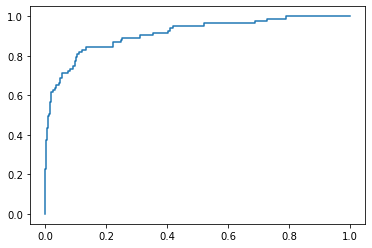

In [251]:
# ROC curve for 5 data set
from sklearn.metrics import roc_curve
y_test_5_pred_scores = cross_val_predict(sgd_5, X_test_sample, y_test_5, cv=3, method = "decision_function")
fpr5, tpr5, thresholds5 = roc_curve(y_test_5, y_test_5_pred_scores)
plt.plot(fpr5, tpr5)
plt.show()

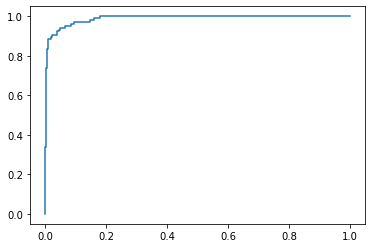

In [252]:
# ROC curve for 6 data set
from sklearn.metrics import roc_curve
y_test_6_pred_scores = cross_val_predict(sgd_6, X_test_sample, y_test_6, cv=3, method = "decision_function")
fpr6, tpr6, thresholds6 = roc_curve(y_test_6, y_test_6_pred_scores)
plt.plot(fpr6, tpr6)
plt.show()

Inference : From the two above models we can say that the ROC curve for the test day with predict =6 performed well .

# Question 3

In [95]:
# importing the data and setting noise as 4
import numpy as np
m = 50 # number of data points
x = 6 * np.random.rand(m,1) - 3
y = 4*(x**2) + 3*x + 2 + 4*np.random.randn(m,1)

In [96]:
print(type(x), x.ndim, x.shape, type(y),y.ndim, y.shape)
print(x[:3])
print(y[:3])

<class 'numpy.ndarray'> 2 (50, 1) <class 'numpy.ndarray'> 2 (50, 1)
[[-1.31693438]
 [ 0.85314461]
 [ 2.42504895]]
[[ 6.85564138]
 [ 2.60931079]
 [31.34213901]]


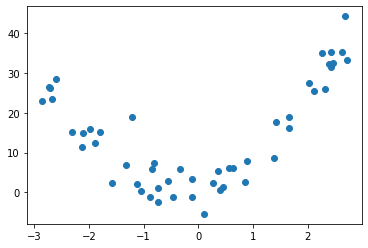

In [97]:
# scatter plot for x and y 
import matplotlib
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [98]:
# test and train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(40, 1) (40, 1) (10, 1) (10, 1)


In [100]:
# linear regression 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.intercept_, lin_reg.coef_)

[15.04816495] [[3.11308625]]


In [101]:


from sklearn.preprocessing import PolynomialFeatures
num_degrees = 2
poly_features = PolynomialFeatures(degree=num_degrees, include_bias=False)
x_poly = poly_features.fit_transform(x)
print(x[0], x_poly[0])
print(x.shape, x_poly.shape)

[-1.31693438] [-1.31693438  1.73431615]
(50, 1) (50, 2)


[1.73326078] [[2.78764596 4.12680872]]
Mean Squared Error on Test:  14.315251182176421


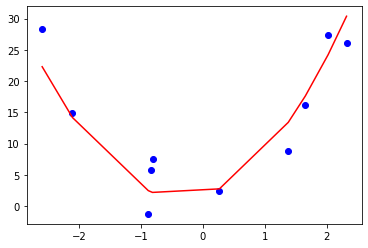

In [102]:

# calculating mean square error on test
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.intercept_, lin_reg.coef_)
y_predict = lin_reg.predict(x_test)
mse = mean_squared_error(y_test,y_predict)
print("Mean Squared Error on Test: ", mse)

order = x_test[:,0].argsort()
x_test = x_test[order]
ys = y_predict[order]
truey = y_test[order]
xs = x_test[:,:-(num_degrees-1)]

plt.plot(xs,ys,"r-")
plt.scatter(xs, truey, color='blue')
plt.show()

Mean Squared Error on Test:  13.478846226647894
[1.91182017] [2.63022138 4.06736097]


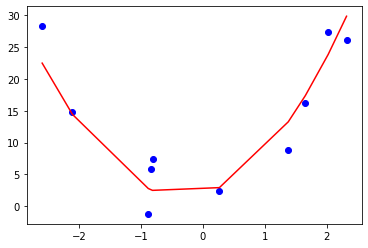

In [106]:
# calculating mean square error with lasso and setting the lasso alpha value.
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(x_train, y_train)
y_predict = lasso_reg.predict(x_test)
mse = mean_squared_error(truey,y_predict)
print("Mean Squared Error on Test: ", mse)
print(lasso_reg.intercept_, lasso_reg.coef_)

plt.plot(xs,y_predict,"r-")
plt.scatter(xs, truey, color='blue')
plt.show()

Inference : The regularized Lasso regression model has less Mean Squared Error compared to linear regression and has  better performance.